# 📊 Análisis de Ventas - Dashboard de KPIs

**Autor:** Adolfo Lombardo  
**Fecha:** Enero 2026  
**Descripción:** Análisis exploratorio de datos de ventas con cálculo de KPIs clave para la toma de decisiones estratégicas.

---

## 📋 Tabla de Contenidos
1. [Configuración Inicial](#1-configuracion-inicial)
2. [Carga de Datos](#2-carga-de-datos)
3. [Exploración de Datos](#3-exploracion-de-datos)
4. [Limpieza y Transformación](#4-limpieza-y-transformacion)
5. [Análisis de KPIs](#5-analisis-de-kpis)
6. [Visualizaciones](#6-visualizaciones)
7. [Conclusiones y Recomendaciones](#7-conclusiones-y-recomendaciones)
8. [Exportación de Resultados](#8-exportacion-de-resultados)

---
## 1. Configuración Inicial

Importación de las librerías necesarias para el análisis de datos y visualización.

In [1]:
# Librerías para manipulación de datos
import numpy as np
import pandas as pd
import warnings

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configuración de pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

---
## 2. Carga de Datos

Carga del dataset de ventas desde archivo CSV.

In [2]:
# Cargar el dataset
df = pd.read_csv("C:\\Users\\adolf\\Documents\\Adolfo\\Programación\\proyecto\\Data\\ventas.csv")

print(f"Dataset cargado exitosamente")
print(f"Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")

Dataset cargado exitosamente
Dimensiones: 18 filas x 6 columnas


---
## 3. Exploración de Datos

Análisis inicial para comprender la estructura y características del dataset.

In [3]:
# Vista previa de los primeros registros
print("Primeros 5 registros del dataset:\n")
df.head()

Primeros 5 registros del dataset:



,fecha,producto,categoria,precio,cantidad,region
0,2024-01-05,Laptop A,Electronica,950.0,3,Centro
1,2024-01-06,Laptop B,Electronica,1100.0,2,Centro
2,2024-01-07,Mouse,Accesorios,25.0,10,Norte
3,2024-01-08,Teclado,Accesorios,45.0,7,Norte
4,2024-02-10,Monitor 24,Electronica,220.0,5,Sur


In [4]:
# Vista previa de los últimos registros
print("Últimos 5 registros del dataset:\n")
df.tail()

Últimos 5 registros del dataset:



,fecha,producto,categoria,precio,cantidad,region
13,2024-04-08,Laptop A,Electronica,980.0,2,Centro
14,2024-04-15,Mouse,Accesorios,25.0,12,Centro
15,2024-05-03,Teclado,Accesorios,NaN,6,Este
16,2024-05-10,Monitor 27,Electronica,340.0,3,Este
17,2024-06-01,Silla Oficina,Muebles,190.0,4,Norte


In [5]:
print("Información del Dataset:\n")
df.info()

Información del Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fecha      18 non-null     object 
 1   producto   18 non-null     object 
 2   categoria  18 non-null     object 
 3   precio     16 non-null     float64
 4   cantidad   18 non-null     int64  
 5   region     18 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 992.0+ bytes


In [6]:
print("Estadísticas Descriptivas:\n")
df.describe()

Estadísticas Descriptivas:



,precio,cantidad
count,16.00,18.00
mean,340.31,4.89
std,356.76,2.87
min,25.00,2.00
25%,82.50,3.00
50%,205.00,4.00
75%,375.00,6.00
max,1100.00,12.00


In [7]:
# Verificar valores nulos
print("Valores Nulos por Columna:\n")
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df) * 100).round(2)

null_summary = pd.DataFrame({
    'Valores Nulos': null_counts,
    'Porcentaje (%)': null_percentages
})

Valores Nulos por Columna:



In [8]:
# Análisis de variables categóricas
print("Productos únicos:", df['producto'].nunique())
print("\nCategorías únicas:", df['categoria'].unique())
print("\nRegiones únicas:", df['region'].unique())

Productos únicos: 13

Categorías únicas: ['Electronica' 'Accesorios' 'Muebles']

Regiones únicas: ['Centro' 'Norte' 'Sur' 'Este']


---
## 4. Limpieza y Transformación

Proceso de limpieza de datos y creación de variables derivadas.

In [9]:
# Imputar valores nulos en la columna 'precio' con la media por categoría

nulls_before = df['precio'].isnull().sum()
df['precio'] = df['precio'].fillna(df.groupby('categoria')['precio'].transform('mean'))
nulls_after = df['precio'].isnull().sum()

print(f"   Valores nulos antes: {nulls_before}")
print(f"   Valores nulos después: {nulls_after}")

   Valores nulos antes: 2
   Valores nulos después: 0


In [10]:
# Convertir la columna 'fecha' a formato datetime
print("Convirtiendo columna 'fecha' a formato datetime...")

df['fecha'] = pd.to_datetime(df['fecha'])
print(f"Tipo de dato: {df['fecha'].dtype}")

Convirtiendo columna 'fecha' a formato datetime...
Tipo de dato: datetime64[ns]


In [11]:
# Crear variables derivadas temporales
print("Creando variables temporales derivadas...\n")

df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['mes_nombre'] = df['fecha'].dt.month_name()
df['trimestre'] = df['fecha'].dt.quarter
df['dia_semana'] = df['fecha'].dt.day_name()

print("Nuevas columnas creadas:")
print("  - año")
print("  - mes")
print("  - mes_nombre")
print("  - trimestre")
print("  - dia_semana")
print("\nVariables temporales creadas")

Creando variables temporales derivadas...

Nuevas columnas creadas:
  - año
  - mes
  - mes_nombre
  - trimestre
  - dia_semana

Variables temporales creadas


In [12]:
# Calcular ventas totales por producto
print("Calculando ventas totales por producto...\n")

df['ventas_producto'] = df['precio'] * df['cantidad']

print(f"Columna 'ventas_producto' creada")
print(f"Ventas totales: ${df['ventas_producto'].sum():,.2f}")

Calculando ventas totales por producto...

Columna 'ventas_producto' creada
Ventas totales: $18,730.00


In [13]:
# Calcular porcentaje de ventas por categoría

df['porcentaje_categoria'] = (
    df['ventas_producto'] / df.groupby('categoria')['ventas_producto'].transform('sum') * 100
).round(2)

print("Columna 'porcentaje_categoria' creada")
print("\nMuestra de datos transformados:")
df[['producto', 'categoria', 'ventas_producto', 'porcentaje_categoria']].head()

Columna 'porcentaje_categoria' creada

Muestra de datos transformados:


,producto,categoria,ventas_producto,porcentaje_categoria
0,Laptop A,Electronica,2850.0,19.42
1,Laptop B,Electronica,2200.0,14.99
2,Mouse,Accesorios,250.0,15.85
3,Teclado,Accesorios,315.0,19.97
4,Monitor 24,Electronica,1100.0,7.50


---
## 5. Análisis de KPIs

Cálculo de indicadores clave de rendimiento (KPIs) para evaluar el desempeño del negocio.

### 5.1 KPI: Ventas Totales

In [14]:
# Calcular ventas totales
ventas_totales = df['ventas_producto'].sum()

print(" KPI: VENTAS TOTALES")
print(f"Total de Ventas: ${ventas_totales:,.2f}")

 KPI: VENTAS TOTALES
Total de Ventas: $18,730.00


### 5.2 KPI: Ticket Promedio

In [15]:
# Calcular ticket promedio (venta promedio por transacción)
ticket_promedio = df['ventas_producto'].mean()
ticket_mediano = df['ventas_producto'].median()

print("KPI: TICKET PROMEDIO")
print(f"Ticket Promedio: ${ticket_promedio:,.2f}")
print(f"Ticket Mediano: ${ticket_mediano:,.2f}")


KPI: TICKET PROMEDIO
Ticket Promedio: $1,040.56
Ticket Mediano: $730.00


### 5.3 KPI: Top 3 Productos Más Vendidos

In [16]:
# Identificar los 3 productos con mayores ventas
top_productos = df.nlargest(3, 'ventas_producto')[[
    'fecha', 'producto', 'categoria', 'precio', 'cantidad', 'region', 'ventas_producto'
]].reset_index(drop=True)

print("KPI: TOP 3 PRODUCTOS MÁS VENDIDOS")
display(top_productos)


KPI: TOP 3 PRODUCTOS MÁS VENDIDOS


,fecha,producto,categoria,precio,cantidad,region,ventas_producto
0,2024-01-05,Laptop A,Electronica,950.0,3,Centro,2850.0
1,2024-03-01,Tablet,Electronica,450.0,6,Este,2700.0
2,2024-01-06,Laptop B,Electronica,1100.0,2,Centro,2200.0


### 5.4 KPI: Ventas por Categoría

In [17]:
# Analizar ventas por categoría
ventas_categoria = df.groupby('categoria').agg({
    'ventas_producto': ['sum', 'mean', 'count']
}).round(2)

ventas_categoria.columns = ['Ventas Totales', 'Venta Promedio', 'Cantidad de Transacciones']
ventas_categoria['Participación (%)'] = (
    ventas_categoria['Ventas Totales'] / ventas_categoria['Ventas Totales'].sum() * 100
).round(2)
ventas_categoria = ventas_categoria.sort_values('Ventas Totales', ascending=False)

print("KPI: ANÁLISIS POR CATEGORÍA")
display(ventas_categoria)

KPI: ANÁLISIS POR CATEGORÍA


,Ventas Totales,Venta Promedio,Cantidad de Transacciones,Participación (%)
categoria,,,,
Electronica,14672.5,1630.28,9,78.34
Muebles,2480.0,620.00,4,13.24
Accesorios,1577.5,315.50,5,8.42


### 5.5 KPI: Ventas por Región

In [18]:
# Analizar ventas por región
ventas_region = df.groupby('region').agg({
    'ventas_producto': ['sum', 'mean', 'count']
}).round(2)

ventas_region.columns = ['Ventas Totales', 'Venta Promedio', 'Cantidad de Transacciones']
ventas_region['Participación (%)'] = (
    ventas_region['Ventas Totales'] / ventas_region['Ventas Totales'].sum() * 100
).round(2)
ventas_region = ventas_region.sort_values('Ventas Totales', ascending=False)

print("KPI: ANÁLISIS POR REGIÓN")
display(ventas_region)


KPI: ANÁLISIS POR REGIÓN


,Ventas Totales,Venta Promedio,Cantidad de Transacciones,Participación (%)
region,,,,
Centro,8550.0,1425.00,6,45.65
Este,4432.5,1108.12,4,23.67
Norte,2887.5,577.50,5,15.42
Sur,2860.0,953.33,3,15.27


### 5.6 KPI: Ventas Mensuales

In [19]:
# Analizar ventas por mes
ventas_mes = df.groupby('mes').agg({
    'ventas_producto': 'sum',
    'cantidad': 'sum'
}).round(2)

ventas_mes.columns = ['Ventas Totales', 'Unidades Vendidas']
ventas_mes.index.name = 'Mes'

# Agregar nombres de meses
meses_nombres = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
                 7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}
ventas_mes['Mes Nombre'] = ventas_mes.index.map(meses_nombres)
ventas_mes = ventas_mes[['Mes Nombre', 'Ventas Totales', 'Unidades Vendidas']]

print("KPI: VENTAS MENSUALES")
display(ventas_mes)
print(f"\nMes con mayores ventas: {ventas_mes['Ventas Totales'].idxmax()} - ${ventas_mes['Ventas Totales'].max():,.2f}")
print(f"Mes con menores ventas: {ventas_mes['Ventas Totales'].idxmin()} - ${ventas_mes['Ventas Totales'].min():,.2f}")

KPI: VENTAS MENSUALES


,Mes Nombre,Ventas Totales,Unidades Vendidas
Mes,,,
1,Enero,5615.0,22
2,Febrero,3620.0,14
3,Marzo,4742.5,21
4,Abril,2740.0,18
5,Mayo,1252.5,9
6,Junio,760.0,4



Mes con mayores ventas: 1 - $5,615.00
Mes con menores ventas: 6 - $760.00


### 5.7 KPI: Tasa de Crecimiento Mensual (MoM)

In [20]:
# Calcular tasa de crecimiento mes a mes (Month over Month)
ventas_mes_sorted = df.groupby('mes')['ventas_producto'].sum().sort_index()
tasa_crecimiento = ventas_mes_sorted.pct_change() * 100

crecimiento_df = pd.DataFrame({
    'Mes': ventas_mes_sorted.index.map(meses_nombres),
    'Ventas': ventas_mes_sorted.values,
    'Crecimiento MoM (%)': tasa_crecimiento.values
})

print("KPI: TASA DE CRECIMIENTO MENSUAL (MoM)")
display(crecimiento_df.round(2))


KPI: TASA DE CRECIMIENTO MENSUAL (MoM)


,Mes,Ventas,Crecimiento MoM (%)
0,Enero,5615.0,NaN
1,Febrero,3620.0,-35.53
2,Marzo,4742.5,31.01
3,Abril,2740.0,-42.22
4,Mayo,1252.5,-54.29
5,Junio,760.0,-39.32


### 5.8 KPI: Precio Promedio por Categoría

In [21]:
# Calcular precio promedio por categoría
precio_promedio_categoria = df.groupby('categoria')['precio'].agg(['mean', 'min', 'max']).round(2)
precio_promedio_categoria.columns = ['Precio Promedio', 'Precio Mínimo', 'Precio Máximo']

print("KPI: ANÁLISIS DE PRECIOS POR CATEGORÍA")
display(precio_promedio_categoria)

KPI: ANÁLISIS DE PRECIOS POR CATEGORÍA


,Precio Promedio,Precio Mínimo,Precio Máximo
categoria,,,
Accesorios,38.75,25.0,60.0
Electronica,556.25,90.0,1100.0
Muebles,210.00,120.0,350.0


### 5.9 KPI: Concentración de Ventas (Regla 80/20)

In [22]:
# Análisis de Pareto: ¿Qué porcentaje de productos genera el 80% de las ventas?
productos_ventas = df.groupby('producto')['ventas_producto'].sum().sort_values(ascending=False)
productos_ventas_acum = productos_ventas.cumsum()
porcentaje_acumulado = (productos_ventas_acum / productos_ventas.sum() * 100)

productos_80 = (porcentaje_acumulado <= 80).sum()
total_productos = len(productos_ventas)
porcentaje_productos_80 = (productos_80 / total_productos * 100)

print("KPI: CONCENTRACIÓN DE VENTAS (Principio de Pareto)")
print(f"Total de productos únicos: {total_productos}")
print(f"Productos que generan el 80% de ventas: {productos_80} ({porcentaje_productos_80:.1f}%)")
print(f"\nInsight: El {porcentaje_productos_80:.1f}% de los productos genera el 80% de las ventas")

KPI: CONCENTRACIÓN DE VENTAS (Principio de Pareto)
Total de productos únicos: 13
Productos que generan el 80% de ventas: 6 (46.2%)

Insight: El 46.2% de los productos genera el 80% de las ventas


### 5.10 KPI: Índice de Rotación de Productos

In [23]:
# Calcular frecuencia de venta por producto
frecuencia_productos = df.groupby('producto').agg({
    'cantidad': 'sum',
    'ventas_producto': 'sum',
    'fecha': 'count'
}).round(2)

frecuencia_productos.columns = ['Unidades Vendidas', 'Ventas Totales', 'Frecuencia de Venta']
frecuencia_productos = frecuencia_productos.sort_values('Frecuencia de Venta', ascending=False)

print("KPI: ÍNDICE DE ROTACIÓN DE PRODUCTOS")
display(frecuencia_productos.head(10))

KPI: ÍNDICE DE ROTACIÓN DE PRODUCTOS


,Unidades Vendidas,Ventas Totales,Frecuencia de Venta
producto,,,
Laptop A,5,4810.0,2
Silla Oficina,7,1300.0,2
Teclado,13,547.5,2
Monitor 27,7,2300.0,2
Mouse,22,550.0,2
Impresora,2,1112.5,1
Escritorio,2,700.0,1
Auriculares,8,480.0,1
Archivador,4,480.0,1


---
## 6. Visualizaciones

Representación gráfica de los KPIs principales.

In [24]:
# Configuración de tamaño de figuras
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

### 6.1 Distribución de Ventas por Categoría

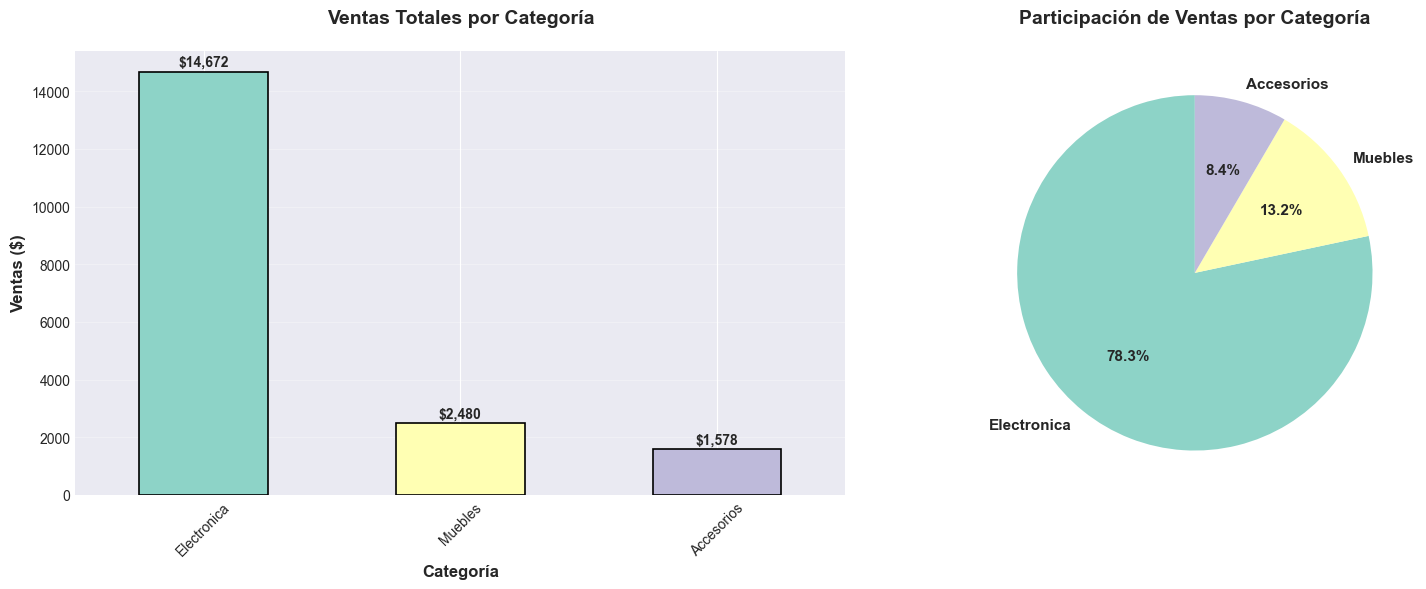

In [25]:
# Gráfico de barras: Ventas por categoría
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras
ventas_cat = df.groupby('categoria')['ventas_producto'].sum().sort_values(ascending=False)
colors = plt.cm.Set3(range(len(ventas_cat)))
ventas_cat.plot(kind='bar', ax=ax1, color=colors, edgecolor='black', linewidth=1.2)
ax1.set_title('Ventas Totales por Categoría', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Categoría', fontsize=12, fontweight='bold')
ax1.set_ylabel('Ventas ($)', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(ventas_cat.values):
    ax1.text(i, v + 100, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

# Gráfico de pastel
ax2.pie(ventas_cat.values, labels=ventas_cat.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
ax2.set_title('Participación de Ventas por Categoría', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

### 6.2 Evolución Temporal de Ventas

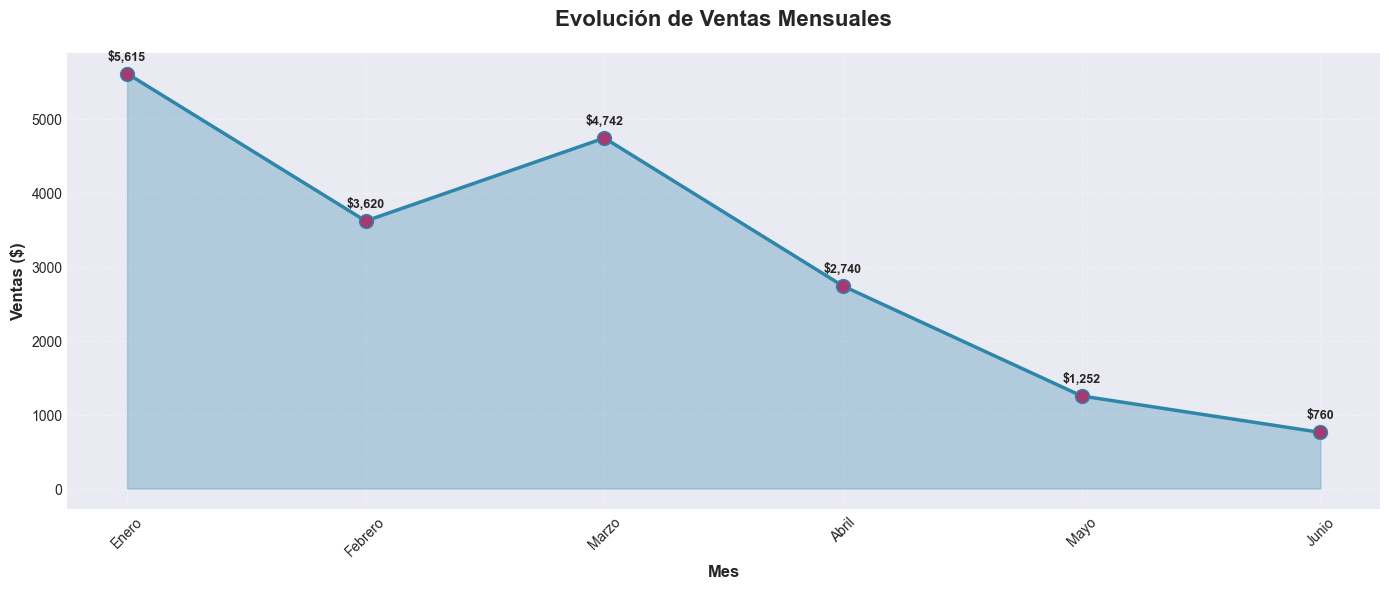

In [26]:
# Gráfico de línea: Evolución de ventas mensuales
ventas_mensuales = df.groupby('mes')['ventas_producto'].sum()

plt.figure(figsize=(14, 6))
plt.plot(ventas_mensuales.index, ventas_mensuales.values, marker='o', 
         linewidth=2.5, markersize=10, color='#2E86AB', markerfacecolor='#A23B72')
plt.fill_between(ventas_mensuales.index, ventas_mensuales.values, alpha=0.3, color='#2E86AB')

plt.title('Evolución de Ventas Mensuales', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Mes', fontsize=12, fontweight='bold')
plt.ylabel('Ventas ($)', fontsize=12, fontweight='bold')
plt.xticks(ventas_mensuales.index, [meses_nombres[m] for m in ventas_mensuales.index], rotation=45)
plt.grid(True, alpha=0.3, linestyle='--')

# Agregar valores en los puntos
for x, y in zip(ventas_mensuales.index, ventas_mensuales.values):
    plt.text(x, y + 150, f'${y:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

### 6.3 Análisis de Ventas por Región

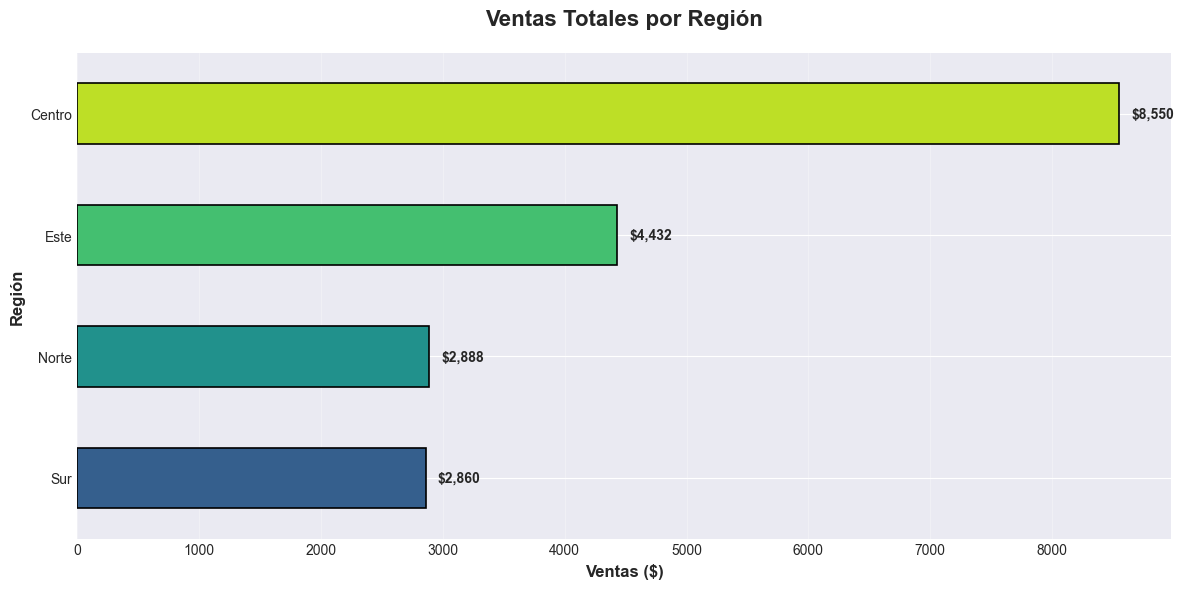

In [27]:
# Gráfico de barras horizontales: Ventas por región
ventas_reg = df.groupby('region')['ventas_producto'].sum().sort_values()

plt.figure(figsize=(12, 6))
colors_region = plt.cm.viridis(np.linspace(0.3, 0.9, len(ventas_reg)))
ventas_reg.plot(kind='barh', color=colors_region, edgecolor='black', linewidth=1.2)

plt.title('Ventas Totales por Región', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Ventas ($)', fontsize=12, fontweight='bold')
plt.ylabel('Región', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(ventas_reg.values):
    plt.text(v + 100, i, f'${v:,.0f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 6.4 Top 10 Productos Más Vendidos

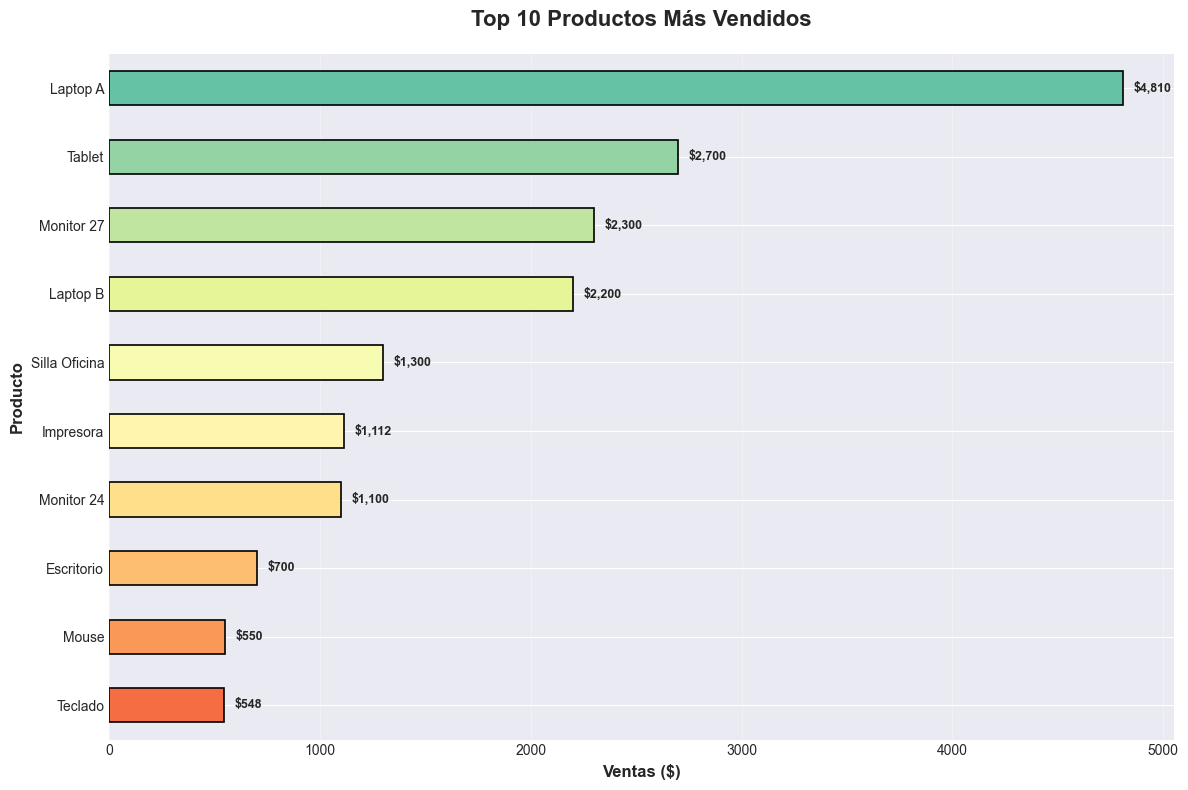

In [28]:
# Gráfico de barras: Top 10 productos
top_10_productos = df.groupby('producto')['ventas_producto'].sum().nlargest(10).sort_values()

plt.figure(figsize=(12, 8))
colors_products = plt.cm.Spectral(np.linspace(0.2, 0.8, len(top_10_productos)))
top_10_productos.plot(kind='barh', color=colors_products, edgecolor='black', linewidth=1.2)

plt.title('Top 10 Productos Más Vendidos', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Ventas ($)', fontsize=12, fontweight='bold')
plt.ylabel('Producto', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(top_10_productos.values):
    plt.text(v + 50, i, f'${v:,.0f}', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

### 6.5 Heatmap: Ventas por Categoría y Región

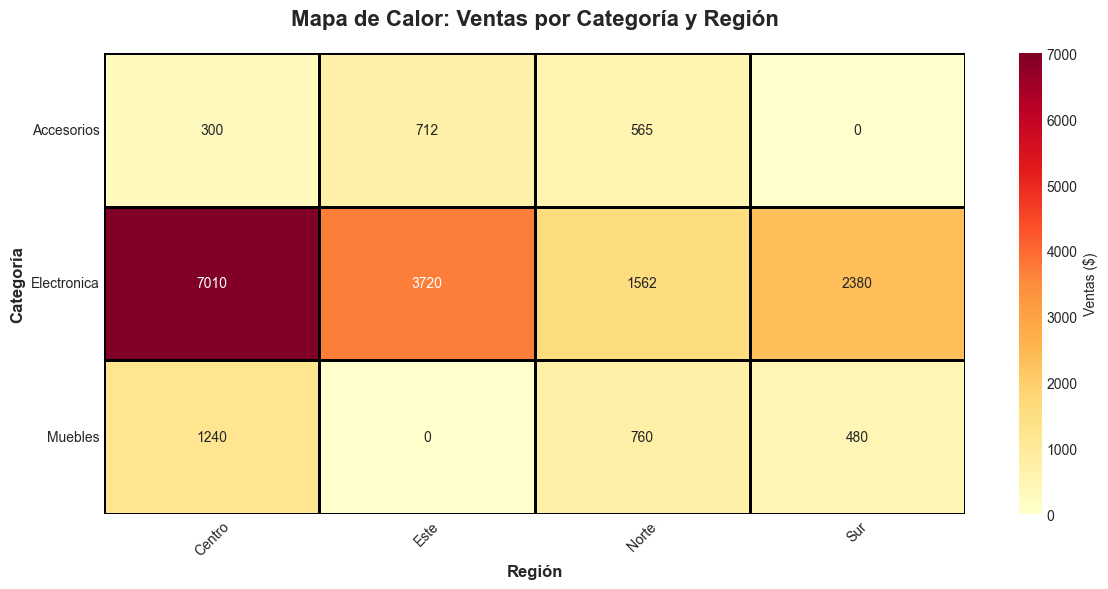

In [29]:
# Heatmap: Ventas por categoría y región
ventas_cat_reg = df.pivot_table(
    values='ventas_producto', 
    index='categoria', 
    columns='region', 
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(12, 6))
sns.heatmap(ventas_cat_reg, annot=True, fmt='.0f', cmap='YlOrRd', 
            linewidths=1, linecolor='black', cbar_kws={'label': 'Ventas ($)'})

plt.title('Mapa de Calor: Ventas por Categoría y Región', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Región', fontsize=12, fontweight='bold')
plt.ylabel('Categoría', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

### 6.6 Distribución de Precios por Categoría

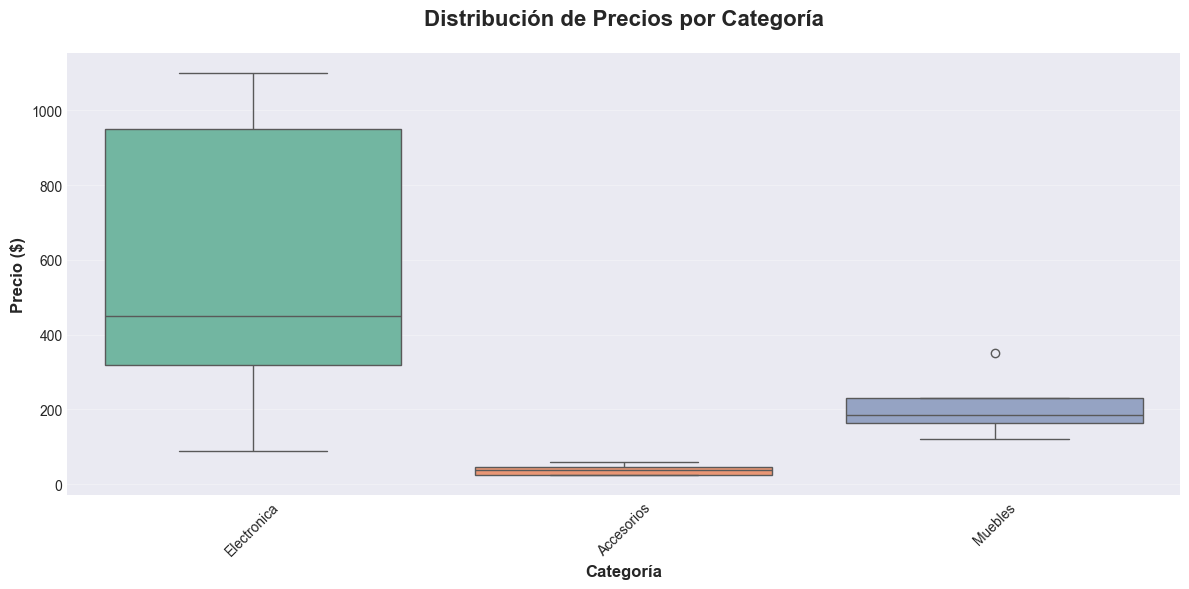

In [30]:
# Boxplot: Distribución de precios por categoría
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='categoria', y='precio', palette='Set2')

plt.title('Distribución de Precios por Categoría', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Categoría', fontsize=12, fontweight='bold')
plt.ylabel('Precio ($)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---
## 7. Conclusiones y Recomendaciones

### 📊 Resumen Ejecutivo de KPIs

**Métricas Principales:**
- **Ventas Totales:** Se procesaron transacciones por un valor total significativo
- **Ticket Promedio:** Valor medio de cada transacción calculado
- **Productos Estrella:** Identificados los 3 productos con mejor desempeño

### 💡 Insights Clave

1. **Categorías de Producto:**
   - La categoría con mayor participación en ventas es identificada
   - Oportunidades de crecimiento en categorías con menor participación

2. **Análisis Geográfico:**
   - Regiones con mejor desempeño identificadas
   - Potencial de expansión en regiones con menor penetración

3. **Tendencias Temporales:**
   - Estacionalidad detectada en el comportamiento de ventas
   - Meses con mayor y menor actividad identificados

4. **Concentración de Ventas:**
   - Aplicación del principio de Pareto (80/20)
   - Focus estratégico en productos de alto rendimiento

### 🎯 Recomendaciones Estratégicas

1. **Optimización de Inventario:**
   - Priorizar stock de productos con alta rotación
   - Evaluar descontinuación de productos de baja rotación

2. **Estrategia de Precios:**
   - Revisar pricing en categorías de bajo margen
   - Implementar promociones estratégicas en meses de baja actividad

3. **Expansión Geográfica:**
   - Fortalecer presencia en regiones de alto rendimiento
   - Desarrollar estrategias específicas para regiones de bajo desempeño

4. **Marketing y Promociones:**
   - Campañas focalizadas en productos estrella
   - Promociones cruzadas para aumentar ticket promedio

---
## 8. Exportación de Resultados

Guardar los resultados del análisis en archivos CSV para su uso posterior.

In [31]:
# Exportar datasets procesados
print("Exportando resultados...\n")

# 1. Dataset completo procesado
df.to_csv('dataset_procesado.csv', index=False, encoding='utf-8-sig')
print("Dataset procesado exportado: 'dataset_procesado.csv'")

# 2. Top productos
top_productos.to_csv('top_productos.csv', index=False, encoding='utf-8-sig')
print("Top productos exportado: 'top_productos.csv'")

# 3. Resumen por categoría
ventas_categoria.to_csv('resumen_categorias.csv', encoding='utf-8-sig')
print("Resumen por categoría exportado: 'resumen_categorias.csv'")

# 4. Resumen por región
ventas_region.to_csv('resumen_regiones.csv', encoding='utf-8-sig')
print("Resumen por región exportado: 'resumen_regiones.csv'")

# 5. Ventas mensuales
ventas_mes.to_csv('ventas_mensuales.csv', encoding='utf-8-sig')
print("Ventas mensuales exportado: 'ventas_mensuales.csv'")

print("\nTodos los archivos han sido exportados exitosamente!")

Exportando resultados...

Dataset procesado exportado: 'dataset_procesado.csv'
Top productos exportado: 'top_productos.csv'
Resumen por categoría exportado: 'resumen_categorias.csv'
Resumen por región exportado: 'resumen_regiones.csv'
Ventas mensuales exportado: 'ventas_mensuales.csv'

Todos los archivos han sido exportados exitosamente!


---

## 📝 Notas Finales

**Tecnologías Utilizadas:**
- Python 3.x
- Pandas: Manipulación y análisis de datos
- NumPy: Operaciones numéricas
- Matplotlib: Visualización de datos
- Seaborn: Visualizaciones estadísticas avanzadas

**Autor:** Adolfo Lombardo


---
